In [3]:
import pandas as pd
import numpy as np
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date
import re

In [4]:
from fastai.tabular import add_datepart

In [133]:
df = pd.read_csv('../HackerEarthPredictGiftPrices/dataset/train.csv')

t = pd.read_csv('dataset/test.csv')

In [6]:
df.head()

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,uk_date1,uk_date2,is_discounted,volumes,price
0,GF_11156,61,534,3942,2014-02-21 05:07:06.000,2016-11-09 15:49:51.000,3377,5221,504,1912,10,554,2014-02-24 08:07:06.000,2014-02-24 07:07:06.000,0,NaN,175.54
1,GF_11157,61,534,3942,2014-02-21 06:07:06.000,2016-11-11 13:49:51.000,3377,5221,504,1912,10,554,2014-02-22 07:07:06.000,2014-02-24 06:07:06.000,1,NaN,95.80
2,GF_15689,584,262,0,2014-02-21 09:30:21.000,2016-03-24 14:46:18.000,5290,1579,3203,1912,9,1578,2016-01-26 00:04:45.000,2016-03-18 02:00:00.000,1,NaN,107.35
3,GF_11155,61,534,3942,2014-02-22 05:07:06.000,2016-11-10 16:49:51.000,3377,5221,504,1912,10,554,2016-11-07 13:49:51.000,2016-11-06 04:00:00.000,0,NaN,172.90
4,GF_11158,61,534,3942,2014-02-22 07:07:06.000,2016-11-10 13:49:51.000,3377,5221,504,1912,9,554,2016-11-07 15:49:51.000,2016-11-06 01:00:00.000,1,NaN,77.72


In [146]:
df['volumes'].median()

13.0

In [147]:
t['volumes'].median()

13.0

In [7]:
df.describe()

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,volumes,price
count,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,20279.000000,7323.000000,20279.000000
mean,739.554662,394.171557,3303.358548,5314.595345,4187.653928,4866.945510,1679.152226,8.652695,1265.898171,0.229646,15.515363,143.404411
std,389.216989,235.077769,2541.082549,2703.317282,2274.875522,2713.856392,485.699119,2.349388,697.838495,0.420616,7.579669,267.281159
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,5.000000,0.010000
25%,403.000000,188.000000,587.000000,3311.000000,2251.000000,2548.000000,1801.000000,9.000000,577.500000,0.000000,9.000000,45.645000
50%,825.000000,433.000000,3231.000000,5520.000000,4246.000000,4839.000000,1912.000000,9.000000,1616.000000,0.000000,13.000000,75.600000
75%,1032.000000,534.000000,5787.000000,7535.000000,6504.500000,7387.000000,1912.000000,10.000000,1899.000000,0.000000,24.000000,126.845000
max,1360.000000,893.000000,7567.000000,9979.000000,7604.000000,9493.000000,2056.000000,10.000000,2065.000000,1.000000,29.000000,7010.270000


In [8]:
def missingcheck(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent_1 = data.isnull().sum()/data.isnull().count()*100
    percent_2 = (np.round(percent_1, 1)).sort_values(ascending=False)
    missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%']) #ptr
    return missing_data


In [135]:
missingcheck(t)

,Total,%
volumes,2352,17.4
is_discounted,0,0.0
uk_date2,0,0.0
uk_date1,0,0.0
lsg_6,0,0.0
lsg_5,0,0.0
lsg_4,0,0.0
lsg_3,0,0.0
lsg_2,0,0.0
lsg_1,0,0.0


In [10]:
#dff = df.drop( ['volumes'],axis =1)
dff = df.fillna(10)

In [11]:
dff['instock_date'] = pd.to_datetime(dff['instock_date'] ,errors='coerce')
dff['justinstock_date'] = dff['instock_date'].dt.date

In [12]:
dff['stock_update_date'] = pd.to_datetime(dff['stock_update_date'] ,errors='coerce')
dff['juststock_update_date'] = dff['stock_update_date'].dt.date

In [13]:
dff['uk_date1'] = pd.to_datetime(dff['uk_date1'] ,errors='coerce')
dff['justuk_date1'] = dff['uk_date1'].dt.date

In [14]:
dff['uk_date2'] = pd.to_datetime(dff['uk_date2'] ,errors='coerce')
dff['justuk_date2'] = dff['uk_date2'].dt.date

In [15]:
# no of days gift was in stock

In [16]:
dff['DaysStockUpdate'] = (dff['stock_update_date']- dff['instock_date']).dt.days

In [17]:
#no of days between order1 and order2

In [18]:
dff['buyer12diff'] = (dff['uk_date1']-dff['uk_date2']).dt.days
dff['buyer12diff'] = np.absolute(dff['buyer12diff'])

In [19]:
# at order1 time was gift in stock

In [20]:
dff['buy1buytime'] = (dff['uk_date1'] -dff['instock_date']).dt.days

In [21]:
dff['buy1buytime'].sort_values()

12967     -5
11146     -5
18180     -5
6231      -5
10812     -5
        ... 
47       881
12       897
8        986
3        989
4        989
Name: buy1buytime, Length: 20279, dtype: int64

In [22]:
# order 2 in stock

In [23]:
dff['buy2buytime'] = (dff['uk_date2'] -dff['instock_date']).dt.days

In [24]:
dff['buy2buytime'].sort_values()

16939   -585
17729   -583
18807   -582
18470   -579
19393   -579
        ... 
61       871
47       877
12       892
4        987
3        987
Name: buy2buytime, Length: 20279, dtype: int64

In [25]:
# stockupdate date differece 

In [26]:
dff['stockupdatediff1'] = (dff['stock_update_date'] - dff['uk_date1']).dt.days

In [27]:
dff['stockupdatediff2'] = (dff['stock_update_date'] - dff['uk_date2']).dt.days

In [28]:
def add_datepart(df, fldname, drop=True):
    fld = df[fldname]
    if not np.issubdtype(fld.dtype, np.datetime64):
        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
    targ_pre = re.sub('[Dd]ate$', '', fldname)
    
#     for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#             'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
    
    for n in ('Year', 'Month', 'Week', 'Day','Hour', 'Dayofweek', 'Dayofyear',
            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
        df[targ_pre+n] = getattr(fld.dt,n.lower())
    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
    if drop: df.drop(fldname, axis=1, inplace=True)

In [29]:
add_datepart(dff, 'instock_date',drop = False)

In [30]:
add_datepart(dff, 'stock_update_date',drop =False)

In [31]:
add_datepart(dff, 'uk_date1', drop=False)

In [32]:
add_datepart(dff, 'uk_date2', drop= False)

In [33]:
dff['instock_date'].max()

Timestamp('2016-11-12 13:48:30')

In [34]:
dff['stock_update_date'].max()

Timestamp('2017-04-21 01:49:50')

In [35]:
dff['uk_date2'].max()

Timestamp('2017-04-17 16:14:57.904000')

In [36]:
import holidays

In [37]:
### was it a holiday or not instockdate, stockupdateday,ukdate1,ukdate2
time = pd.DataFrame()

In [38]:
# start = dff['instock_date'].min()

# end = dff['stock_update_date'].max()

# time['date'] = pd.date_range(start,end)

In [39]:
# uk_holidays=[]
# for holiday in holidays.UK(years=[2014,2015,2016]).items():
#     uk_holidays.append(str(holiday[0]))

In [40]:
#uk_holidays

In [41]:
# dff['Isholidayinstock']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['instock_date']]
# dff['Isholidaystockupdate']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['stock_update_date']]
# dff['IsholidayUkdate1']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['uk_date1']]
# dff['IsholidayUkdate2']= [ 1 if str(val).split()[0] in uk_holidays else 0 for val in dff['uk_date2']]

In [42]:
####### grace period dates ######

In [43]:
from datetime import datetime, timedelta

In [44]:
uk_graceholiday=[]
for holiday in holidays.UK(years=[2014,2015,2016]).items():
    uk_graceholiday.append(holiday[0])

In [45]:
graceondate=[]
for i in uk_graceholiday:
    twodayago = i - timedelta(days = 3)
    twodayafter = i + timedelta(days = 3)
    for date in pd.date_range(twodayago,twodayafter):
        graceondate.append((str(date).split()[0]))
    

In [46]:
uk_graceperiod = list(set(graceondate))

In [47]:
dff['Isholidayinstockgrceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['instock_date']]
dff['Isholidaystock_update_dategrceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['stock_update_date']]
dff['IsholidayUk_date1grceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['uk_date1']]
dff['IsholidayUk_date2grceperiod']= [ 1 if str(val).split()[0] in uk_graceperiod else 0 for val in dff['uk_date2']]


In [48]:
x = dff[['lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6']].values

In [49]:
import random as rd
import matplotlib.pyplot as plt

In [50]:
from sklearn.cluster import KMeans

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(x)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5
count,2.027900e+04,2.027900e+04,2.027900e+04,2.027900e+04,2.027900e+04,2.027900e+04
mean,-1.540045e-15,6.360775e-16,-1.540669e-15,2.482540e-14,-3.141691e-14,-5.467001e-15
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-1.966002e+00,-1.840873e+00,-1.793413e+00,-3.451094e+00,-3.683048e+00,-1.814072e+00
25%,-7.411800e-01,-8.513440e-01,-8.545046e-01,2.508771e-01,1.478315e-01,-9.864964e-01
50%,7.598432e-02,2.564866e-02,-1.029760e-02,4.794193e-01,1.478315e-01,5.017070e-01
75%,8.213832e-01,1.018475e+00,9.286109e-01,4.794193e-01,5.734848e-01,9.072550e-01
max,1.725480e+00,1.501810e+00,1.704648e+00,7.759064e-01,5.734848e-01,1.145138e+00


In [52]:
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [53]:
# inertia on the fitted data
kmeans.inertia_

97367.19428971212

In [54]:
# # fitting multiple k-means algorithms and storing the values in an empty list
# SSE = []
# for cluster in range(1,30):
#     kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
#     kmeans.fit(data_scaled)
#     SSE.append(kmeans.inertia_)

# # converting the results into a dataframe and plotting them
# frame = pd.DataFrame({'Cluster':range(1,30), 'SSE':SSE})
# plt.figure(figsize=(12,6))
# plt.plot(frame['Cluster'], frame['SSE'], marker='o')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')

In [131]:
# kmeans = KMeans(n_jobs = -1, n_clusters = 15, init='k-means++')
# kmeans.fit(data_scaled)
# pred = kmeans.predict(data_scaled)

In [132]:
# frame = pd.DataFrame(data_scaled)
# frame['cluster'] = pred
# frame['cluster'].value_counts()

In [56]:
# ghnata kuch hua clustering karke

In [57]:
# interaction variables 

In [58]:
def createIntercations(data,cat_features):
    import itertools
    print(f"Creating features on {cat_features}, with combination 2 for training data /n")
    interactionstrain = pd.DataFrame(index=data.index)
    
    for col1 ,col2 in  itertools.combinations(cat_features,2):   
        newcolname = col1 + "_" + col2 #+"_" + col3
        new_values = data[col1].map(str) + "_" + data[col2].map(str) # + "_" + data[col3].map(str)
        interactionstrain[newcolname] = new_values

    print(interactionstrain)
    data_df = data.join(interactionstrain)
    
    
    print(data_df.shape)
    
    
    return data_df


In [59]:
def createIntercations2(data,cat_features):
    import itertools
    print(f"Creating features on {cat_features}, with combination 3 for training data /n")
    interactionstrain = pd.DataFrame(index=data.index)
    
    for col1 ,col2,col3 in  itertools.combinations(cat_features,3):   
        newcolname = col1 + "_" + col2 +"_" + col3
        new_values = data[col1].map(str) + "_" + data[col2].map(str)  + "_" + data[col3].map(str)
        interactionstrain[newcolname] = new_values

    print(interactionstrain)
    data_df = data.join(interactionstrain)
    
    
    print(data_df.shape)
    
    
    return data_df


In [60]:
def createlogfestures(data,features):
  
     cols = features
     interactionstrain = pd.DataFrame(index=data.index)
        
     for col  in cols:   
            newcolname = col + "_log"   
            new_values = np.log1p(data[col])
            interactionstrain[newcolname] = new_values

  

     data_df = data.join(interactionstrain)
  
     print(data_df.shape)


     return data_df 


In [61]:
def createsqrtfeatures(train,test,features):
    

  cols = features
  interactionstrain = pd.DataFrame(index=train.index)
  interactionstest = pd.DataFrame(index=test.index)
  
  for col  in cols:   
        newcolname = col + "_sqrt"   
        new_values = np.sqrt(train[col])
        interactionstrain[newcolname] = new_values

  for col  in cols:   
        newcolname = col + "_sqrt"   
        new_values = np.sqrt(test[col])
        interactionstest[newcolname] = new_values


  train_df = train.join(interactionstrain)
  test_df = test.join(interactionstest)

  print(train_df.shape,test_df.shape)


  return train_df ,test_df


In [62]:
interactiondff1 = createIntercations(dff,['gift_type','gift_category','gift_cluster'])

Creating features on ['gift_type', 'gift_category', 'gift_cluster'], with combination 2 for training data /n
      gift_type_gift_category gift_type_gift_cluster  \
0                      61_534                61_3942   
1                      61_534                61_3942   
2                     584_262                  584_0   
3                      61_534                61_3942   
4                      61_534                61_3942   
...                       ...                    ...   
20274                 105_704               105_6448   
20275                1220_526               1220_817   
20276                 509_705                509_821   
20277                 682_213               682_5620   
20278                1061_212              1061_4987   

      gift_category_gift_cluster  
0                       534_3942  
1                       534_3942  
2                          262_0  
3                       534_3942  
4                       534_3942  
...     

In [63]:
interactiondff2 = createIntercations2(interactiondff1,['gift_type','gift_category','gift_cluster'])

Creating features on ['gift_type', 'gift_category', 'gift_cluster'], with combination 3 for training data /n
      gift_type_gift_category_gift_cluster
0                              61_534_3942
1                              61_534_3942
2                                584_262_0
3                              61_534_3942
4                              61_534_3942
...                                    ...
20274                         105_704_6448
20275                         1220_526_817
20276                          509_705_821
20277                         682_213_5620
20278                        1061_212_4987

[20279 rows x 1 columns]
(20279, 91)


In [64]:
interactiondff2

,gift_id,gift_type,gift_category,gift_cluster,instock_date,stock_update_date,lsg_1,lsg_2,lsg_3,lsg_4,...,uk_date2Is_year_start,uk_date2Elapsed,Isholidayinstockgrceperiod,Isholidaystock_update_dategrceperiod,IsholidayUk_date1grceperiod,IsholidayUk_date2grceperiod,gift_type_gift_category,gift_type_gift_cluster,gift_category_gift_cluster,gift_type_gift_category_gift_cluster
0,GF_11156,61,534,3942,2014-02-21 05:07:06,2016-11-09 15:49:51,3377,5221,504,1912,...,False,1393225626,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
1,GF_11157,61,534,3942,2014-02-21 06:07:06,2016-11-11 13:49:51,3377,5221,504,1912,...,False,1393222026,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
2,GF_15689,584,262,0,2014-02-21 09:30:21,2016-03-24 14:46:18,5290,1579,3203,1912,...,False,1458266400,0,1,0,1,584_262,584_0,262_0,584_262_0
3,GF_11155,61,534,3942,2014-02-22 05:07:06,2016-11-10 16:49:51,3377,5221,504,1912,...,False,1478404800,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
4,GF_11158,61,534,3942,2014-02-22 07:07:06,2016-11-10 13:49:51,3377,5221,504,1912,...,False,1478394000,0,0,0,0,61_534,61_3942,534_3942,61_534_3942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20274,GF_10269,105,704,6448,2016-11-12 13:46:42,2016-11-17 10:46:42,2055,6883,995,1912,...,False,1478833200,0,0,0,0,105_704,105_6448,704_6448,105_704_6448
20275,GF_5854,1220,526,817,2016-11-12 13:46:47,2016-11-18 13:46:47,8323,6753,6706,1912,...,False,1477620000,0,0,0,0,1220_526,1220_817,526_817,1220_526_817
20276,GF_563,509,705,821,2016-11-12 13:46:57,2017-01-21 19:30:04,2826,4009,2912,1912,...,False,1484701200,0,0,0,0,509_705,509_821,705_821,509_705_821
20277,GF_9107,682,213,5620,2016-11-12 13:47:01,2016-11-18 11:47:01,2089,6883,3607,1912,...,False,1479002400,0,0,0,0,682_213,682_5620,213_5620,682_213_5620


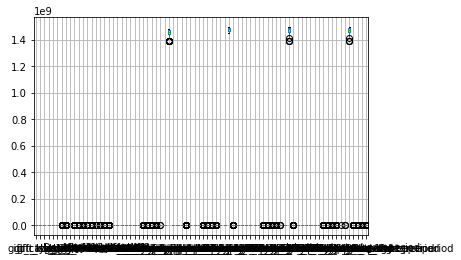

In [65]:
import matplotlib.pyplot as plt
interactiondff2.boxplot()

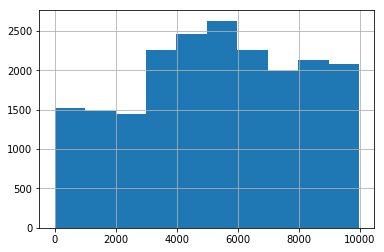

In [66]:
((df['lsg_1'])).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38a89c5eb8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f38a82ad908>]], dtype=object)

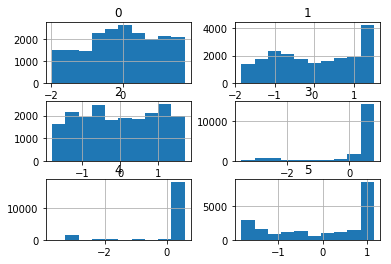

In [67]:
(pd.DataFrame(data_scaled)).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f38a8083a58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f38a85b6b38>]], dtype=object)

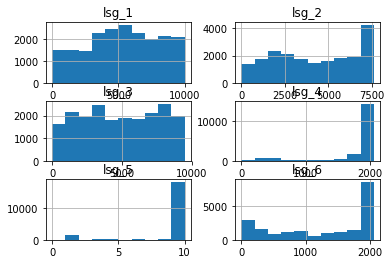

In [68]:
dff[['lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6']].hist()

In [69]:
interactiondff3 = createIntercations(interactiondff2,['lsg_1','lsg_2','lsg_3','lsg_4','lsg_5','lsg_6'])

Creating features on ['lsg_1', 'lsg_2', 'lsg_3', 'lsg_4', 'lsg_5', 'lsg_6'], with combination 2 for training data /n
      lsg_1_lsg_2 lsg_1_lsg_3 lsg_1_lsg_4 lsg_1_lsg_5 lsg_1_lsg_6 lsg_2_lsg_3  \
0       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
1       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
2       5290_1579   5290_3203   5290_1912      5290_9   5290_1578   1579_3203   
3       3377_5221    3377_504   3377_1912     3377_10    3377_554    5221_504   
4       3377_5221    3377_504   3377_1912      3377_9    3377_554    5221_504   
...           ...         ...         ...         ...         ...         ...   
20274   2055_6883    2055_995   2055_1912     2055_10   2055_1899    6883_995   
20275   8323_6753   8323_6706   8323_1912     8323_10   8323_1899   6753_6706   
20276   2826_4009   2826_2912   2826_1912     2826_10   2826_1451   4009_2912   
20277   2089_6883   2089_3607   2089_1912     2089_10    2089_822   6883_

In [70]:
dff.shape

(20279, 87)

In [71]:
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        from sklearn.preprocessing import LabelEncoder

        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)


In [72]:
def catVar2(data):
    categorical_colsT2 = [cname for cname in data.columns if data[cname].dtype == "object"]
    return categorical_colsT2


In [73]:
def robustlabelencoder(train,test):
    from sklearn.preprocessing import LabelEncoder

    label_enc = LabelEncoderExt()
    cols = catVar2(train)
    print(cols)
    for col in cols:
        label_enc.fit(train[col])
        train[col] = label_enc.transform(train[col])
        test[col] = label_enc.transform(test[col])
        
    print(train.shape,test.shape)
    
    return train,test


In [74]:
## delete dates

In [75]:
interactiondff3['justuk_date1'].dtypes

dtype('O')

In [76]:
date_cols = [cname for cname in interactiondff3.columns if interactiondff3[cname].dtype == "datetime64[ns]"]

In [77]:
date_cols

['instock_date', 'stock_update_date', 'uk_date1', 'uk_date2']

In [78]:
interactiondff3.shape

(20279, 106)

In [79]:
final_df = interactiondff3.drop(['instock_date', 'stock_update_date', 'uk_date1', 'uk_date2','justinstock_date','juststock_update_date','justuk_date1','justuk_date2','gift_id'],axis =1)*1

In [80]:
final_df.columns

Index(['gift_type', 'gift_category', 'gift_cluster', 'lsg_1', 'lsg_2', 'lsg_3',
       'lsg_4', 'lsg_5', 'lsg_6', 'is_discounted', 'volumes', 'price',
       'DaysStockUpdate', 'buyer12diff', 'buy1buytime', 'buy2buytime',
       'stockupdatediff1', 'stockupdatediff2', 'instock_Year', 'instock_Month',
       'instock_Week', 'instock_Day', 'instock_Hour', 'instock_Dayofweek',
       'instock_Dayofyear', 'instock_Is_month_end', 'instock_Is_month_start',
       'instock_Is_quarter_end', 'instock_Is_quarter_start',
       'instock_Is_year_end', 'instock_Is_year_start', 'instock_Elapsed',
       'stock_update_Year', 'stock_update_Month', 'stock_update_Week',
       'stock_update_Day', 'stock_update_Hour', 'stock_update_Dayofweek',
       'stock_update_Dayofyear', 'stock_update_Is_month_end',
       'stock_update_Is_month_start', 'stock_update_Is_quarter_end',
       'stock_update_Is_quarter_start', 'stock_update_Is_year_end',
       'stock_update_Is_year_start', 'stock_update_Elapsed', 'uk_d

In [81]:
from sklearn.model_selection import train_test_split


In [82]:
y = final_df.price
train_data = final_df.drop(['price'], axis=1)


In [83]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data, y, train_size=0.99, test_size=0.01,random_state=0)

In [84]:
X_trainenc,X_validenc = robustlabelencoder(X_train,X_valid)

['gift_type_gift_category', 'gift_type_gift_cluster', 'gift_category_gift_cluster', 'gift_type_gift_category_gift_cluster', 'lsg_1_lsg_2', 'lsg_1_lsg_3', 'lsg_1_lsg_4', 'lsg_1_lsg_5', 'lsg_1_lsg_6', 'lsg_2_lsg_3', 'lsg_2_lsg_4', 'lsg_2_lsg_5', 'lsg_2_lsg_6', 'lsg_3_lsg_4', 'lsg_3_lsg_5', 'lsg_3_lsg_6', 'lsg_4_lsg_5', 'lsg_4_lsg_6', 'lsg_5_lsg_6']


/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ryan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


(20076, 96) (203, 96)


In [85]:
X_trainenc

,gift_type,gift_category,gift_cluster,lsg_1,lsg_2,lsg_3,lsg_4,lsg_5,lsg_6,is_discounted,...,lsg_2_lsg_3,lsg_2_lsg_4,lsg_2_lsg_5,lsg_2_lsg_6,lsg_3_lsg_4,lsg_3_lsg_5,lsg_3_lsg_6,lsg_4_lsg_5,lsg_4_lsg_6,lsg_5_lsg_6
18322,415,705,723,4652,1080,2429,1912,10,150,1,...,77,89,108,77,1722,1521,1333,657,2322,282
2332,418,390,3599,8490,1552,2510,1912,10,213,0,...,435,569,541,431,1794,1600,1407,657,2795,616
17859,159,56,6648,3756,4693,859,813,9,92,0,...,3509,4718,3428,3363,9930,7404,6413,1233,4389,1996
3376,996,317,3715,7316,5975,5592,439,9,348,0,...,4476,6431,4549,4331,5738,4794,4154,914,3961,1797
16388,1299,213,1052,1094,6883,7377,1912,10,1899,0,...,6330,7835,5367,5159,7517,6703,5820,657,2640,493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,136,534,2799,3587,6748,958,1912,10,1899,1,...,5046,7709,5244,4901,11186,8139,7236,657,2640,493
19648,899,188,4938,1695,1137,5113,1912,10,150,0,...,132,143,181,131,5180,4286,3709,657,2322,282
9845,973,315,6567,9423,3784,8517,1760,9,1899,0,...,2905,3515,2708,2757,9324,7348,6366,500,1094,1713
10799,886,93,216,6282,4627,4529,1912,9,634,0,...,3469,4589,3382,3323,4601,3613,3155,665,3059,1911


In [85]:
#### preprocessing

In [86]:
from sklearn import preprocessing
s = preprocessing.StandardScaler()


In [87]:
X_trainencScale = s.fit_transform(X_trainenc)

In [88]:
X_validencScale = s.transform(X_validenc)

In [89]:
pd.DataFrame(X_trainencScale)

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.834601,1.321393,-1.015033,-0.245727,-1.365020,-0.899085,0.478780,0.573342,-1.601430,1.832407,...,-1.783847,-1.694234,-1.842540,-1.906016,-1.170881,-1.168692,-1.170810,-0.003226,-0.171879,-1.532991
1,-0.826894,-0.018146,0.116747,1.173637,-1.157551,-0.869249,0.478780,0.573342,-1.511103,-0.545730,...,-1.608822,-1.525884,-1.606534,-1.702864,-1.147932,-1.136489,-1.135922,-0.003226,0.341821,-0.974440
2,-1.492287,-1.438483,1.316607,-0.577084,0.223086,-1.477392,-1.786204,0.147897,-1.684589,-0.545730,...,-0.105952,-0.070707,-0.032974,-0.020261,1.445297,1.229443,1.224187,3.145576,2.072981,1.333348
3,0.658037,-0.328579,0.162396,0.739470,0.786593,0.266001,-2.556999,0.147897,-1.317545,-0.545730,...,0.366812,0.530093,0.578027,0.535251,0.109159,0.165507,0.159168,1.401708,1.608153,1.000558
4,1.436470,-0.770839,-0.885563,-1.561540,1.185708,0.923503,0.478780,0.573342,0.906227,-0.545730,...,1.273228,1.022517,1.023878,1.010420,0.676189,0.943689,0.944613,-0.003226,0.173484,-1.180134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20071,-1.551376,0.594215,-0.198073,-0.639583,1.126368,-1.440926,0.478780,0.573342,0.906227,1.832407,...,0.645484,0.978325,0.956837,0.862360,1.845628,1.529057,1.612195,-0.003226,0.173484,-1.180134
20072,0.408836,-0.877152,0.643678,-1.339280,-1.339966,0.089562,0.478780,0.573342,-1.601430,-0.545730,...,-1.756958,-1.675295,-1.802752,-1.875027,-0.068695,-0.041573,-0.050630,-0.003226,-0.171879,-1.532991
20073,0.598948,-0.337084,1.284732,1.518677,-0.176468,1.343420,0.165516,0.147897,0.906227,-0.545730,...,-0.401246,-0.492635,-0.425410,-0.368029,1.252143,1.206615,1.202028,-0.861493,-1.505545,0.860084
20074,0.375438,-1.281140,-1.214550,0.357077,0.194075,-0.125553,0.478780,0.147897,-0.907488,-0.545730,...,-0.125507,-0.115951,-0.058046,-0.043216,-0.253243,-0.315913,-0.311817,0.040508,0.628538,1.191201


In [90]:
#### boxcox

In [91]:
#####models

In [114]:
import matplotlib.pyplot as plt
import math
import numpy as np
import pandas as pd
import random

# importing sklearn libraries
from sklearn import neural_network, linear_model, preprocessing, svm, tree
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB

# importing keras libraries
#from keras.models import Sequential
#from keras.layers import Dense
#from keras.wrappers.scikit_learn import KerasRegressor

import warnings

# supressing the warning on the usage of Linear Regression model
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [93]:
mae_values = []
variance_score = []

In [114]:
linear_regression = linear_model.LinearRegression()

linear_regression.fit(X_trainenc, y_train)
predicted_y = linear_regression.predict(X_validenc)

#print('Coefficients: \n', linear_regression.coef_)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))

#print_values(test_y, predicted_y)


Mean absolute error:  497.93216769849107
Variance score: -29.43


In [99]:
from sklearn.ensemble import BaggingRegressor
from sklearn.svm import SVR
regr = BaggingRegressor(base_estimator=SVR(),n_estimators=10, random_state=0).fit(X_trainenc,y_train )

predicted_y = regr.predict(X_validenc)

#print('Coefficients: \n', linear_regression.coef_)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))

#print_values(test_y, predicted_y)


Mean absolute error:  98.38184494706289
Variance score: -0.06


In [100]:
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(random_state=0)
elasticnet.fit(X_trainenc,y_train)
predicted_y = elasticnet.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))



Mean absolute error:  174.58691404740455
Variance score: -0.19


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 239305322.25031218, tolerance: 86623.82793089871
  positive)


In [101]:


from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
extra_tree.fit(X_trainenc,y_train)
predicted_y = extra_tree.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))



Mean absolute error:  67.16942677514793
Variance score: 0.50


In [102]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=5)
neigh.fit(X_trainenc, y_train)
predicted_y = neigh.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))




Mean absolute error:  76.19198619329389
Variance score: 0.57


In [103]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(X_trainenc, y_train)
predicted_y = decision_tree.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)



Mean absolute error:  61.90429240631163
Variance score: 0.61


In [104]:
mlp = neural_network.MLPRegressor(hidden_layer_sizes = (150,50,50), activation = "tanh", solver = "sgd", learning_rate = "adaptive")

mlp.fit(X_trainenc, y_train)
predicted_y = mlp.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))



Mean absolute error:  122.42731388139553
Variance score: -0.00


In [105]:
svm_model = svm.SVR()

svm_model.fit(X_trainenc, y_train)
predicted_y = svm_model.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))



Mean absolute error:  98.37870924962604
Variance score: -0.06


In [106]:
random_forest = RandomForestRegressor()
random_forest.fit(X_trainenc, y_train)
predicted_y = random_forest.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))



Mean absolute error:  59.39843043639053
Variance score: 0.75


In [107]:
bayesian_ridge = linear_model.BayesianRidge()
bayesian_ridge.fit(X_trainenc, y_train)
predicted_y = bayesian_ridge.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))




Mean absolute error:  511.85394356098345
Variance score: -23.78


In [108]:
lasso_model = linear_model.Lasso()
lasso_model.fit(X_trainenc,y_train)
predicted_y = lasso_model.predict(X_validenc)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))

mae_values.append(mean_absolute_error(y_valid, predicted_y))
variance_score.append(r2_score(y_valid, predicted_y))





Mean absolute error:  171.77174879663812
Variance score: -0.15


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 233166830.91246396, tolerance: 86623.82793089871
  positive)


In [171]:
lgbc=LGBMRegressor(n_estimators=150, learning_rate=0.09, num_leaves=42, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

lgbc.fit(X_trainenc,y_train)
predicted_y= lgbc.predict(X_validenc)
print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))



Mean absolute error:  52.5954843118256
Variance score: 0.72


In [109]:
def generate_plot(title, ticks, dataset, color_number):
    colors = ["slateblue", "mediumseagreen", "tomato"]
    plt.figure(figsize=(8, 6))
    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)   
    ax.spines["bottom"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    
    plt.xticks(np.arange(len(ticks)), ticks, fontsize=10, rotation=30)
    plt.title(title, fontsize = 22)
    plt.bar(ticks, dataset, linewidth=1.2, color=colors[color_number])

In [110]:
mae_values

[497.93216769849107,
 98.38184494706289,
 174.58691404740455,
 67.16942677514793,
 76.19198619329389,
 61.90429240631163,
 122.42731388139553,
 98.37870924962604,
 59.39843043639053,
 511.85394356098345,
 171.77174879663812]

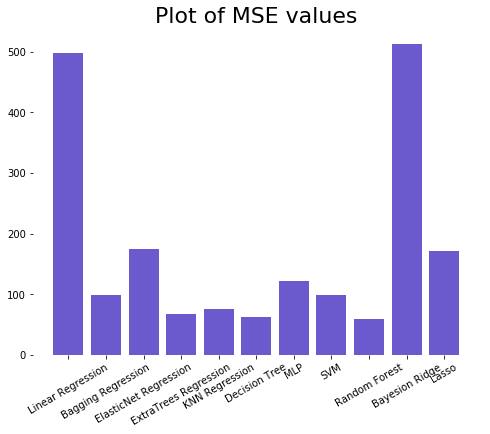

In [111]:
ticks = ["Linear Regression",'Bagging Regression','ElasticNet Regression','ExtraTrees Regression','KNN Regression', "Decision Tree", "MLP", "SVM", "Random Forest", "Bayesion Ridge", "Lasso"]
generate_plot("Plot of MSE values", ticks, mae_values, 0)

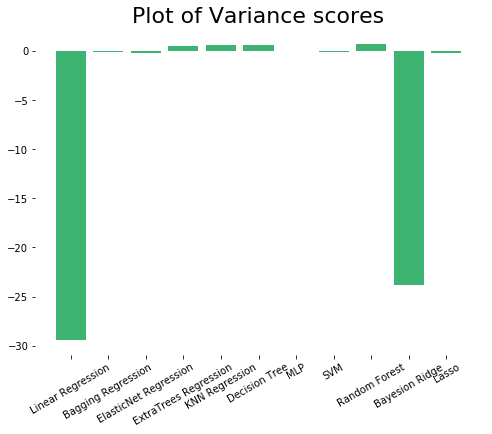

In [112]:
generate_plot("Plot of Variance scores", ticks, variance_score, 1)

In [115]:
##### extra tree regressor and decision tree knnregressor k=5

In [116]:
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
extra_tree.fit(X_trainencScale,y_train)
predicted_y = extra_tree.predict(X_validencScale)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))


Mean absolute error:  82.12253081854044
Variance score: 0.41


In [117]:
decision_tree = tree.DecisionTreeRegressor(presort = True)

decision_tree.fit(X_trainencScale, y_train)
predicted_y = decision_tree.predict(X_validencScale)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)



Mean absolute error:  62.61057322485207
Variance score: 0.67


In [120]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=6)
neigh.fit(X_trainencScale, y_train)
predicted_y = neigh.predict(X_validencScale)

print("\nMean absolute error: ", mean_absolute_error(y_valid, predicted_y))
print('Variance score: %.2f' % r2_score(y_valid, predicted_y))



Mean absolute error:  62.44396840072321
Variance score: 0.59


In [94]:
###### feature seection 

In [86]:
def cor_selector(X, y):
    feature_name = X.columns.tolist()
    cor_list = []
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-70:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

In [87]:
cor_support, cor_feature = cor_selector(X_trainenc, y_train)
print(str(len(cor_feature)), 'selected features')

70 selected features


/home/ryan/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/ryan/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


In [88]:
#cor_feature

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f = SelectKBest(f_regression, k=70)
f.fit(X_trainenc, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/home/ryan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ryan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ryan/.local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SelectKBest(k=70, score_func=<function f_regression at 0x7f38375b8d08>)

In [98]:
f_support = f.get_support()
f_feature = X_trainenc.loc[:,f_support].columns.tolist()


In [115]:
#f_feature
from sklearn.tree import DecisionTreeRegressor
decision_tree = tree.DecisionTreeRegressor(presort = True)


In [118]:
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator= DecisionTreeRegressor(), n_features_to_select=70, step=10, verbose=5)
rfe_selector.fit(X_trainenc, y_train)

Fitting estimator with 96 features.
Fitting estimator with 86 features.
Fitting estimator with 76 features.


RFE(estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                    max_depth=None, max_features=None,
                                    max_leaf_nodes=None,
                                    min_impurity_decrease=0.0,
                                    min_impurity_split=None, min_samples_leaf=1,
                                    min_samples_split=2,
                                    min_weight_fraction_leaf=0.0,
                                    presort='deprecated', random_state=None,
                                    splitter='best'),
    n_features_to_select=70, step=10, verbose=5)

In [119]:
rfe_support = rfe_selector.get_support()
rfe_feature = X_trainenc.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

70 selected features


In [120]:
#rfe_feature

In [121]:
from sklearn.feature_selection import SelectFromModel
#from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestRegressor(n_estimators=100), threshold='1.25*median')
embeded_rf_selector.fit(X_trainenc, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [122]:
embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_trainenc.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

43 selected features


In [123]:
#embeded_rf_feature

In [124]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMRegressor

lgbc=LGBMRegressor(n_estimators=150, learning_rate=0.09, num_leaves=42, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, threshold='1.25*median')
embeded_lgb_selector.fit(X_trainenc, y_train)

SelectFromModel(estimator=LGBMRegressor(boosting_type='gbdt', class_weight=None,
                                        colsample_bytree=0.2,
                                        importance_type='split',
                                        learning_rate=0.09, max_depth=-1,
                                        min_child_samples=20,
                                        min_child_weight=40,
                                        min_split_gain=0.01, n_estimators=150,
                                        n_jobs=-1, num_leaves=42,
                                        objective=None, random_state=None,
                                        reg_alpha=3, reg_lambda=1, silent=True,
                                        subsample=1.0, subsample_for_bin=200000,
                                        subsample_freq=0),
                max_features=None, norm_order=1, prefit=False,
                threshold='1.25*median')

In [125]:
embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_trainenc.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

41 selected features


In [126]:
embeded_lgb_feature
feature_name = X_trainenc.columns.tolist()

In [127]:
#feature_name = final_df.columns.tolist()

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name, 'Pearson':cor_support, 'f-reg':f_support, 'RFE':rfe_support,'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)


,Feature,Pearson,f-reg,RFE,Random Forest,LightGBM,Total
1,uk_date2Elapsed,True,True,True,True,True,5
2,uk_date2Dayofyear,True,True,True,True,True,5
3,uk_date2Day,True,True,True,True,True,5
4,uk_date1Elapsed,True,True,True,True,True,5
5,uk_date1Dayofyear,True,True,True,True,True,5
6,stockupdatediff2,True,True,True,True,True,5
7,stockupdatediff1,True,True,True,True,True,5
8,stock_update_Elapsed,True,True,True,True,True,5
9,stock_update_Dayofyear,True,True,True,True,True,5
10,lsg_5_lsg_6,True,True,True,True,True,5


In [128]:
#feature_name = final_df.columns.tolist()

pd.set_option('display.max_rows', None)
# put all selection together
feature_selection_df = pd.DataFrame({'Feature':feature_name,'RFE':rfe_support,'Random Forest':embeded_rf_support, 'LightGBM':embeded_lgb_support})
# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis=1)
# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total','Feature'] , ascending=False)
feature_selection_df.index = range(1, len(feature_selection_df)+1)
feature_selection_df.head(100)


,Feature,RFE,Random Forest,LightGBM,Total
1,uk_date2Elapsed,True,True,True,3
2,uk_date2Dayofyear,True,True,True,3
3,uk_date2Day,True,True,True,3
4,uk_date1Elapsed,True,True,True,3
5,uk_date1Dayofyear,True,True,True,3
6,stockupdatediff2,True,True,True,3
7,stockupdatediff1,True,True,True,3
8,stock_update_Hour,True,True,True,3
9,stock_update_Elapsed,True,True,True,3
10,stock_update_Dayofyear,True,True,True,3


In [129]:
d =list(feature_selection_df['Feature'][:70])

In [130]:
d

['uk_date2Elapsed',
 'uk_date2Dayofyear',
 'uk_date2Day',
 'uk_date1Elapsed',
 'uk_date1Dayofyear',
 'stockupdatediff2',
 'stockupdatediff1',
 'stock_update_Hour',
 'stock_update_Elapsed',
 'stock_update_Dayofyear',
 'lsg_6',
 'lsg_5_lsg_6',
 'lsg_3_lsg_6',
 'lsg_3_lsg_5',
 'lsg_3_lsg_4',
 'lsg_3',
 'lsg_2_lsg_6',
 'lsg_2_lsg_5',
 'lsg_2_lsg_4',
 'lsg_2_lsg_3',
 'lsg_2',
 'lsg_1_lsg_3',
 'lsg_1_lsg_2',
 'lsg_1',
 'instock_Elapsed',
 'gift_type_gift_cluster',
 'gift_type_gift_category_gift_cluster',
 'gift_type_gift_category',
 'gift_type',
 'gift_cluster',
 'gift_category_gift_cluster',
 'gift_category',
 'buyer12diff',
 'buy2buytime',
 'DaysStockUpdate',
 'uk_date2Week',
 'uk_date1Week',
 'uk_date1Hour',
 'stock_update_Week',
 'stock_update_Day',
 'lsg_4_lsg_6',
 'lsg_1_lsg_5',
 'lsg_1_lsg_4',
 'is_discounted',
 'instock_Week',
 'instock_Hour',
 'instock_Dayofyear',
 'instock_Day',
 'buy1buytime',
 'volumes',
 'uk_date2Month',
 'uk_date2Hour',
 'uk_date2Dayofweek',
 'uk_date1Month',
 